In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

In [14]:
df = pd.read_csv("online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [96]:
print("Dataset shape before cleaning:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset shape before cleaning:
Rows: 1067371, Columns: 8


In [97]:
print("Column names:")
df.columns.tolist()


Column names:


['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [98]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

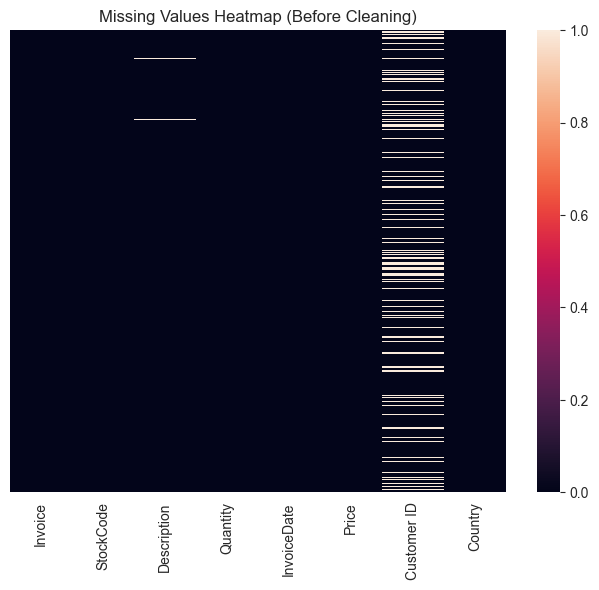

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap (Before Cleaning)')
plt.show()


In [66]:
# Remove cancellations (invoices starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)] # Remove invalid rows
print("After removing cancellations and negatives:")
print(f"Shape: {df.shape}")

After removing cancellations and negatives:
Shape: (1041670, 8)


In [67]:
df['Quantity'].value_counts().head(10)



Quantity
1     293454
2     159663
12    121697
6      85228
3      72458
4      72286
24     47008
10     40897
8      25770
5      23074
Name: count, dtype: int64

In [68]:
df['Price'].value_counts().head(10)


Price
1.25    102803
1.65     72507
0.85     68264
2.95     64453
0.42     44999
2.10     41762
3.75     39474
4.95     34153
1.95     33573
2.55     31018
Name: count, dtype: int64

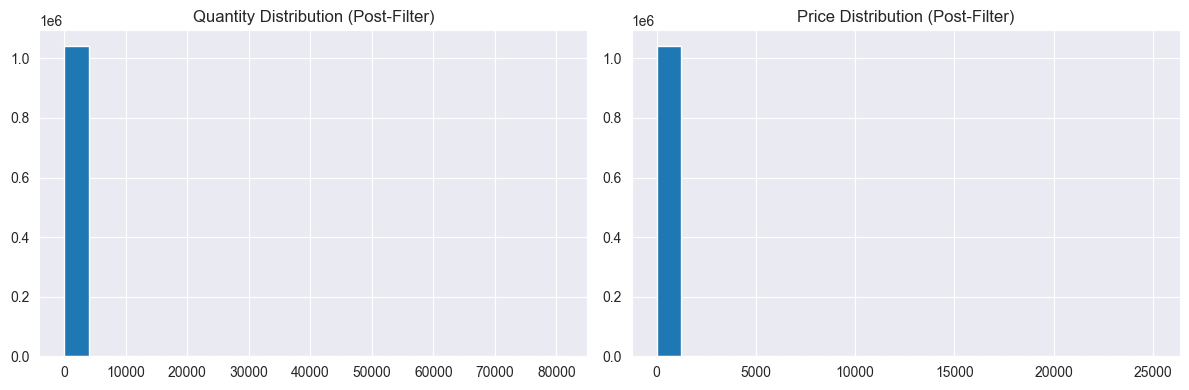

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df['Quantity'].hist(bins=20, ax=axes[0])
axes[0].set_title('Quantity Distribution (Post-Filter)')

df['Price'].hist(bins=20, ax=axes[1])
axes[1].set_title('Price Distribution (Post-Filter)')

plt.tight_layout()
plt.show()


In [70]:
df.isnull().sum()


Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236121
Country             0
dtype: int64

In [71]:
duplicates_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates_count} duplicates.")

df


Duplicate rows: 33757
Removed 33757 duplicates.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


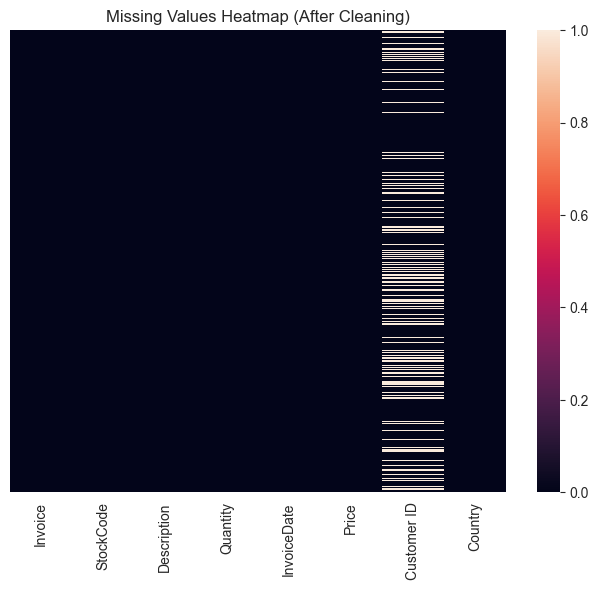

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap (After Cleaning)')
plt.show()


In [73]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate_only'] = df['InvoiceDate'].dt.date
invalid_dates = df['InvoiceDate'].isna().sum()
print(f"Invalid dates found and dropped: {invalid_dates}")

df = df.dropna(subset=['InvoiceDate'])
print("Date range after standardization:")
print(f"From: {df['InvoiceDate'].min()} to: {df['InvoiceDate'].max()}")


Invalid dates found and dropped: 0
Date range after standardization:
From: 2009-12-01 07:45:00 to: 2011-12-09 12:50:00


In [74]:
df[['Invoice', 'InvoiceDate', 'InvoiceDate_only']].head(10)


,Invoice,InvoiceDate,InvoiceDate_only
0,489434,2009-12-01 07:45:00,2009-12-01
1,489434,2009-12-01 07:45:00,2009-12-01
2,489434,2009-12-01 07:45:00,2009-12-01
3,489434,2009-12-01 07:45:00,2009-12-01
4,489434,2009-12-01 07:45:00,2009-12-01
5,489434,2009-12-01 07:45:00,2009-12-01
6,489434,2009-12-01 07:45:00,2009-12-01
7,489434,2009-12-01 07:45:00,2009-12-01
8,489435,2009-12-01 07:46:00,2009-12-01
9,489435,2009-12-01 07:46:00,2009-12-01


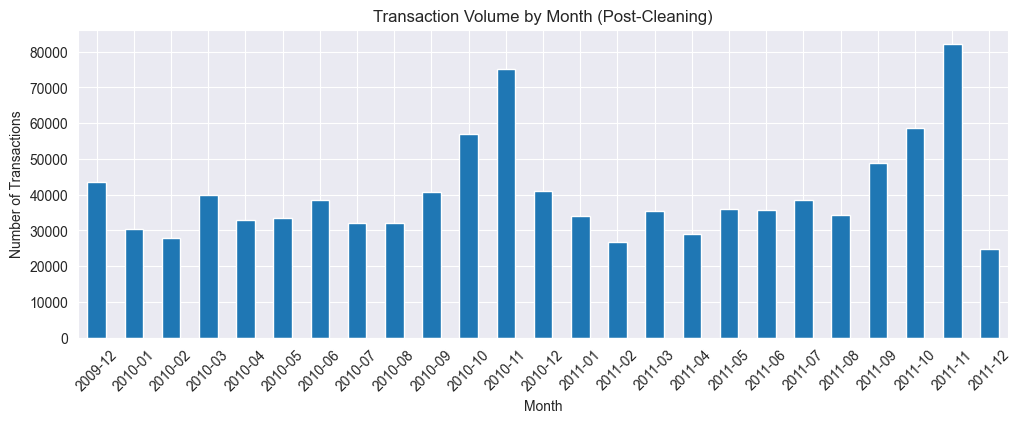

In [75]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_counts = df['Month'].value_counts().sort_index()

monthly_counts.plot(kind='bar', figsize=(12, 4))
plt.title('Transaction Volume by Month (Post-Cleaning)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [76]:
# Standardize Description: lowercase + strip spaces
df['Description'] = df['Description'].str.lower().str.strip()
print("Top 10 items BEFORE standardization (illustrative sample):")

sample_before = [
    '15cm christmas glass ball 20 lights',
    'pink cherry lights',
    'white cherry lights'
]

pd.Series(sample_before).value_counts().head(10)


Top 10 items BEFORE standardization (illustrative sample):


15cm christmas glass ball 20 lights    1
pink cherry lights                     1
white cherry lights                    1
Name: count, dtype: int64

In [77]:
item_counts = df['Description'].value_counts()
item_counts.head(20)


Description
white hanging heart t-light holder    5601
regency cakestand 3 tier              3950
jumbo bag red retrospot               3312
assorted colour bird ornament         2848
party bunting                         2705
lunch bag  black skull.               2402
strawberry ceramic trinket box        2352
jumbo storage bag suki                2352
jumbo shopper vintage red paisley     2209
heart of wicker small                 2195
60 teatime fairy cake cases           2179
lunch bag spaceboy design             2128
lunch bag cars blue                   2091
wooden frame antique white            2087
home building block word              2087
paper chain kit 50's christmas        2068
natural slate heart chalkboard        2059
wooden picture frame white finish     2026
pack of 60 pink paisley cake cases    2025
rex cash+carry jumbo shopper          1996
Name: count, dtype: int64

In [78]:
print(f"Unique items after standardization: {len(df['Description'].unique())}")

Unique items after standardization: 5356


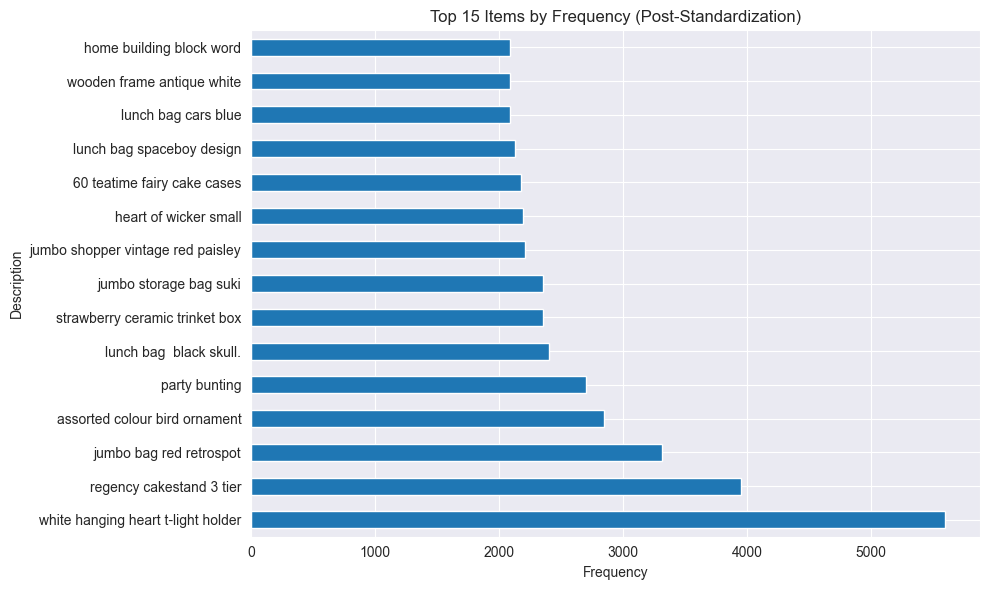

In [79]:
top_items = item_counts.head(15)

top_items.plot(kind='barh', figsize=(10, 6))
plt.title('Top 15 Items by Frequency (Post-Standardization)')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()


In [80]:
print("Starting aggregation... This may take 2-10 minutes on large data.")

basket = (df.groupby(['Invoice', 'Description'])['Quantity']
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('Invoice'))

basket.head()


Starting aggregation... This may take 2-10 minutes on large data.


Description,*boombox ipod classic,*usb office glitter lamp,*usb office mirror ball,10 colour spaceboy pen,11 pc ceramic tea set polkadot,12 ass zinc christmas decorations,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

print("Basket matrix shape (Unique Invoices x Unique Items):")
print(basket_sets.shape)


Basket matrix shape (Unique Invoices x Unique Items):
(40077, 5356)


In [82]:
print("Sample of first 5 invoices (first 5 items):")
basket_sets.iloc[:5, :5].astype(int)


Sample of first 5 invoices (first 5 items):


Description,*boombox ipod classic,*usb office glitter lamp,*usb office mirror ball,10 colour spaceboy pen,11 pc ceramic tea set polkadot
Invoice,,,,,
489434,0,0,0,0,0
489435,0,0,0,0,0
489436,0,0,0,0,0
489437,0,0,0,0,0
489438,0,0,0,0,0


In [83]:
dense_items = (basket_sets.sum(axis=0) > 0).sum()  # Items appearing at least once
sparsity = 100 * (basket_sets.values != 0).sum() / basket_sets.size

print(f"Items with at least one occurrence: {dense_items}")
print(f"Sparsity (non-zero cells %): {sparsity:.2f}%")


Items with at least one occurrence: 5356
Sparsity (non-zero cells %): 0.46%


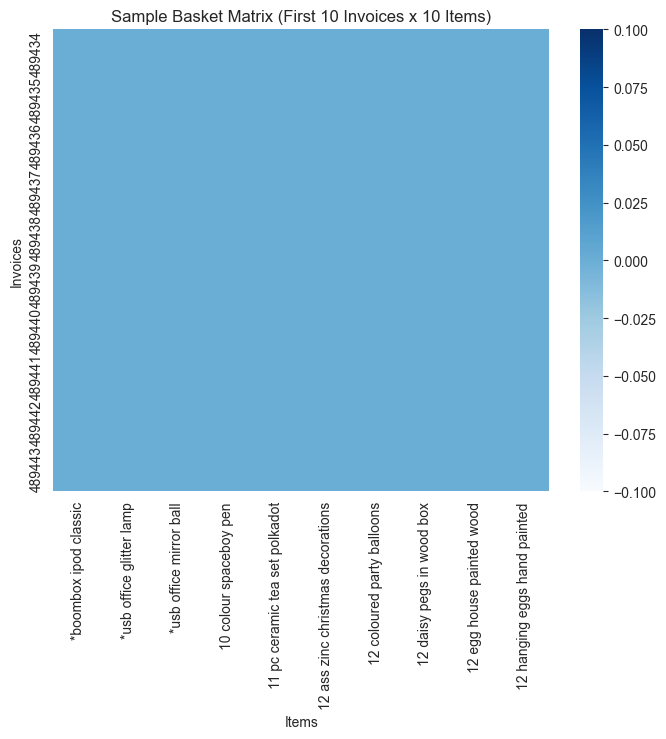

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(basket_sets.iloc[:10, :10], cmap='Blues', cbar=True)
plt.title('Sample Basket Matrix (First 10 Invoices x 10 Items)')
plt.xlabel('Items')
plt.ylabel('Invoices')
plt.show()


In [86]:
original_rows = 1067371
post_cancellations = 1041670
post_duplicates = 1007913  # From Cell 3 (1,041,670 - 33,757)
final_line_items = df.shape[0]  # Should match post_duplicates
final_baskets = basket_sets.shape[0]

summary = pd.DataFrame({
    'Step': [
        'Original Line-Items',
        'After Cancellations/Negatives',
        'After Missing/Duplicates',
        'Final Cleaned Line-Items',
        'Aggregated Baskets (Invoices)'
    ],
    'Rows': [
        original_rows,
        post_cancellations,
        post_duplicates,
        final_line_items,
        final_baskets
    ],
    'Unique Items': [
        None, None, None, len(df['Description'].unique()), basket_sets.shape[1]
    ],
    'Notes': [
        'Raw data',
        '-2.4% (cancellations)',
        '-3.2% (duplicates)',
        'Ready for mining',
        'Binary matrix ready'
    ]
})

print("Full Cleaning & Preprocessing Summary:")
summary


Full Cleaning & Preprocessing Summary:


,Step,Rows,Unique Items,Notes
0,Original Line-Items,1067371,NaN,Raw data
1,After Cancellations/Negatives,1041670,NaN,-2.4% (cancellations)
2,After Missing/Duplicates,1007913,NaN,-3.2% (duplicates)
3,Final Cleaned Line-Items,1007913,5356.0,Ready for mining
4,Aggregated Baskets (Invoices),40077,5356.0,Binary matrix ready


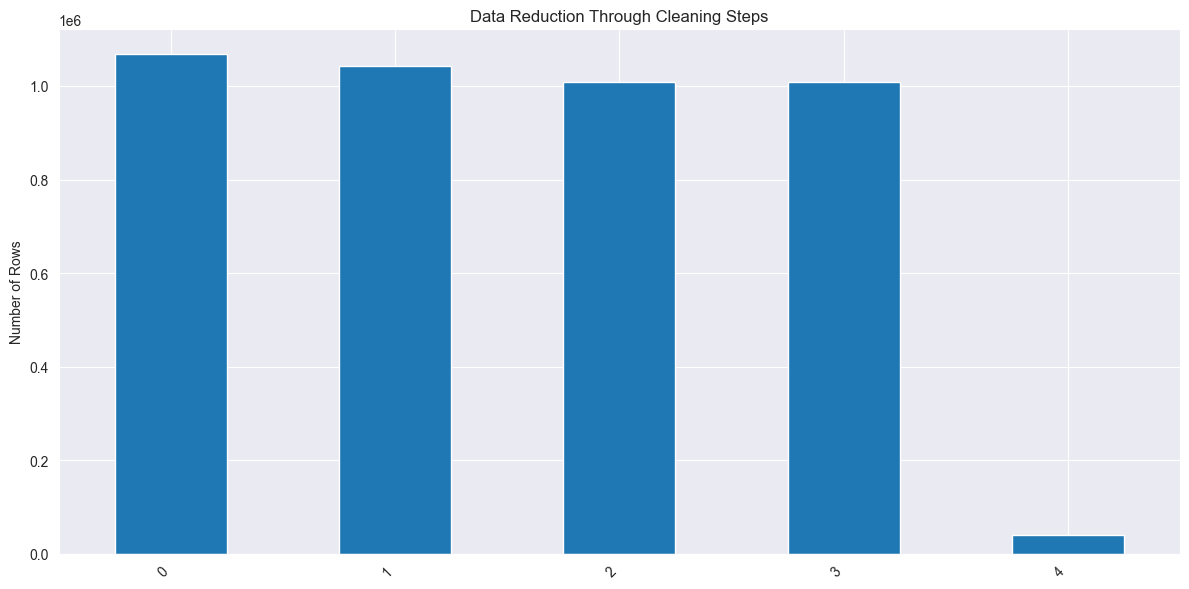

In [87]:
# Bar plot for row reduction
steps = summary['Step'].str[:20]  # Truncate for labels

summary['Rows'].plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Data Reduction Through Cleaning Steps')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


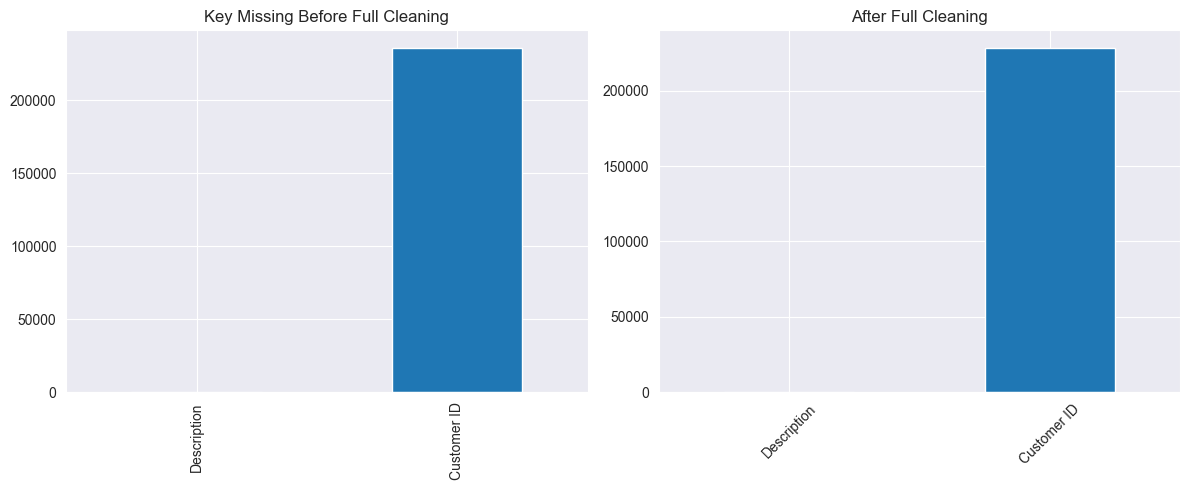

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before full cleaning (illustrative; adjust exact counts if needed)
before_missing = pd.Series({'Description': 0, 'Customer ID': 236121})
before_missing.plot(kind='bar', ax=axes[0], title='Key Missing Before Full Cleaning')

# After full cleaning
after_missing = pd.Series({'Description': 0, 'Customer ID': df['Customer ID'].isnull().sum()})
after_missing.plot(kind='bar', ax=axes[1], title='After Full Cleaning')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [89]:

# Frequent itemsets (min_support=0.01 → items in ≥1% of baskets)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True, low_memory=True)

frequent_itemsets.head()


,support,itemsets
0,0.014597,(10 colour spaceboy pen)
1,0.011104,(12 message cards with envelopes)
2,0.016418,(12 pencil small tube woodland)
3,0.013349,(12 pencils small tube red retrospot)
4,0.020511,(12 pencils small tube skull)


In [90]:
# Generate rules with lift >1.2 and confidence >0.5
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules = rules[rules['confidence'] > 0.5]  # Keep strong rules

print(f"Frequent itemsets found: {len(frequent_itemsets)}")
print(f"Strong rules generated: {len(rules)}")


Frequent itemsets found: 1086
Strong rules generated: 186


In [91]:
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)
top_rules


,antecedents,consequents,support,confidence,lift
10,(72 sweetheart fairy cake cases),(60 teatime fairy cake cases),0.018265,0.501370,9.446827
12,(pack of 60 dinosaur cake cases),(60 teatime fairy cake cases),0.016793,0.516500,9.731916
44,(alarm clock bakelike ivory),(alarm clock bakelike green),0.011129,0.597855,18.821873
46,(alarm clock bakelike pink),(alarm clock bakelike green),0.013299,0.550052,17.316903
48,(alarm clock bakelike green),(alarm clock bakelike red),0.020860,0.656716,19.309775
49,(alarm clock bakelike red),(alarm clock bakelike green),0.020860,0.613353,19.309775
50,(alarm clock bakelike ivory),(alarm clock bakelike red),0.012526,0.672922,19.786284
52,(alarm clock bakelike orange),(alarm clock bakelike red),0.010580,0.692810,20.371067
54,(alarm clock bakelike pink),(alarm clock bakelike red),0.014821,0.613003,18.024450
57,(painted metal pears assorted),(assorted colour bird ornament),0.013200,0.715832,10.220309


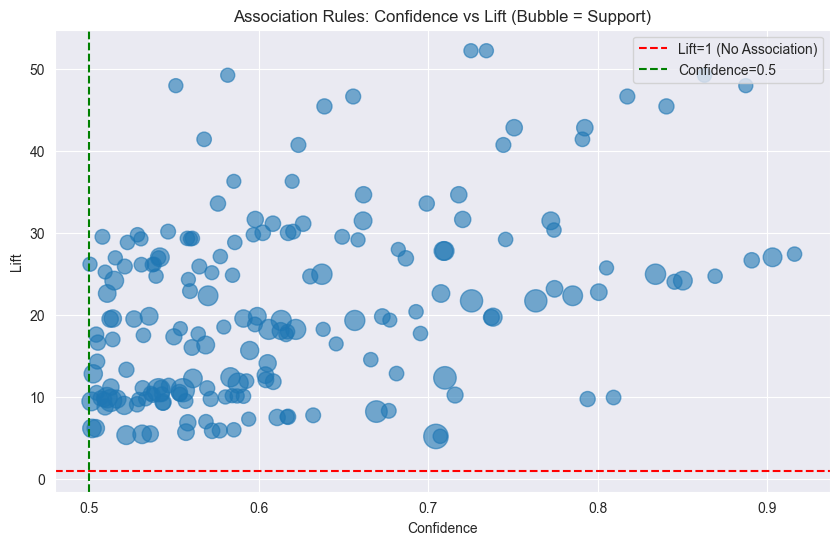

In [93]:
plt.figure(figsize=(10, 6))

plt.scatter(rules['confidence'], rules['lift'], alpha=0.6, s=rules['support']*10000)  # Bubble size = support
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs Lift (Bubble = Support)')

plt.axhline(y=1, color='r', linestyle='--', label='Lift=1 (No Association)')
plt.axvline(x=0.5, color='g', linestyle='--', label='Confidence=0.5')
plt.legend()
plt.show()
